# Working with Data 
Several libraries offer useful tools to work with data in order to allow for a meaningful analysis. One of the most popular and powerful is [**Pandas**](https://pandas.pydata.org/pandas-docs/stable/index.html). Beside including efficient ways for cleaning and manipulating data, pandas also includes functions for statistical analysis and graphics.

Usually, pandas is imported under the alias ```pd```.

In [1]:
import pandas as pd

## Pandas - DataFrames and Series

### Indexing
The basic elements for data are *DataFrames* and *Series*. A DataFrame is a whole matrix- or table-like representation of data with column and row names. A Series can be understood as a single column of such a data matrix (but without the need for a table).\
There are respective functions to turn other objects, e.g. lists or dicts, into DataFrames or Series. Indexing, similar to lists or dicts, uses square brackets.

In [2]:
my_list = [1,2,3,4,5,6,7]
my_df = pd.DataFrame(my_list, columns=['var1'])
print('df:\n', my_df)

my_series = pd.Series(my_list)
print('series:\n',my_series)

# selecting a single column from a DataFrame
print('select column from df:\n', my_df['var1'])

df:
    var1
0     1
1     2
2     3
3     4
4     5
5     6
6     7
series:
 0    1
1    2
2    3
3    4
4    5
5    6
6    7
dtype: int64
select column from df:
 0    1
1    2
2    3
3    4
4    5
5    6
6    7
Name: var1, dtype: int64


To select specific rows or columns, the ```iloc``` method, for selecting based on an index, and ```loc``` method, based on labels, are recommended. Especially when several columns are to be selected. Indexing can also be done by boolean Series (or lists) and thus conditionally. \
Another way to select a single column is by chaining the column's name to the DataFrame's name by a dot (like in method chaining).

In [3]:
my_df = pd.DataFrame(
{'age': [20, 34, 56],
 'height': [183, 179, 172]
}, index=['person_a', 'person_b', 'person_c'])
print(my_df)
print('1.:', my_df.loc['person_b','age'], 'is the same as',  my_df.iloc[1,0])

# age > 27
print('indexing by condition/list\n', my_df.loc[my_df.age >27], '\ncorresponds to \n', my_df.loc[[False, True, True]])
print(type(my_df.age >27))

          age  height
person_a   20     183
person_b   34     179
person_c   56     172
1.: 34 is the same as 34
indexing by condition/list
           age  height
person_b   34     179
person_c   56     172 
corresponds to 
           age  height
person_b   34     179
person_c   56     172
<class 'pandas.core.series.Series'>


### Useful Methods

Pandas includes many useful methods that will help you get to know and manipulate a dataset. Some of these methods are shown in the following, others are introduced later when needed.\
More often than not, a dataset will contain missing values, i.e. cells in a data table contain no value. They will be depicted as ```NaN```, **N**ot **a** **N**umber.

In [4]:
import numpy as np
my_df =  pd.DataFrame(
{'age': [20, 34, 56, np.nan, 44],
 'height': [183, 179, np.nan,  163, np.nan]
})
my_df

,age,height
0,20.0,183.0
1,34.0,179.0
2,56.0,NaN
3,NaN,163.0
4,44.0,NaN


In [5]:
# view the first rows (view last rows with .tail())
print('0.\n', my_df.head(n=5))

# general information
print('\n1.')
my_df.info()

# descriptive statistsics on dataset
print('\n2.\n',my_df.describe())

# number of missing values per column
print('\n3.\n',my_df.isnull().sum())

# single statistics are included as methods, also for single columns
print('\n4.\n', my_df.age.mean())

# fill missing values (e.g. with mean of column)
print('\n 5.\n', my_df.fillna(my_df.mean()))    

# note that you must assign this to my_df (or a different variable) in order to impute missing values permanently!
my_df = my_df.fillna(my_df.mean())

# sort values by column(s)
print('\n6.\n', my_df.sort_values(by=['height']))    

0.
     age  height
0  20.0   183.0
1  34.0   179.0
2  56.0     NaN
3   NaN   163.0
4  44.0     NaN

1.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     4 non-null      float64
 1   height  3 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes

2.
              age      height
count   4.000000    3.000000
mean   38.500000  175.000000
std    15.264338   10.583005
min    20.000000  163.000000
25%    30.500000  171.000000
50%    39.000000  179.000000
75%    47.000000  181.000000
max    56.000000  183.000000

3.
 age       1
height    2
dtype: int64

4.
 38.5

 5.
     age  height
0  20.0   183.0
1  34.0   179.0
2  56.0   175.0
3  38.5   163.0
4  44.0   175.0

6.
     age  height
3  38.5   163.0
2  56.0   175.0
4  44.0   175.0
1  34.0   179.0
0  20.0   183.0


In [6]:
# get column names (useful for looping)
print('7.\n', my_df.columns)

# drop rows containing missing values
print('8.\n', my_df.dropna()) 

# drop rows or columns
print('9.\n', my_df.drop(['age'], axis=1))

# merge DataFrames (automatically on shared variable if not specified otherwise)
df2 = pd.DataFrame(
{'age': [20, 34, 56, np.nan, 44],
 'weight': [83, 63, 98,  50, 77]
})
print('10.\n', my_df.merge(df2))
my_df = my_df.merge(df2)

# correlation matrix
print('11.\n', my_df.corr())

# adding new columns
my_df = my_df.assign(bmi = my_df.weight/(my_df.height/100)**2)
my_df

7.
 Index(['age', 'height'], dtype='object')
8.
     age  height
0  20.0   183.0
1  34.0   179.0
2  56.0   175.0
3  38.5   163.0
4  44.0   175.0
9.
    height
0   183.0
1   179.0
2   175.0
3   163.0
4   175.0
10.
     age  height  weight
0  20.0   183.0      83
1  34.0   179.0      63
2  56.0   175.0      98
3  44.0   175.0      77
11.
              age    height    weight
age     1.000000 -0.946549  0.481176
height -0.946549  1.000000 -0.282126
weight  0.481176 -0.282126  1.000000


,age,height,weight,bmi
0,20.0,183.0,83,24.784258
1,34.0,179.0,63,19.662308
2,56.0,175.0,98,32.000000
3,44.0,175.0,77,25.142857


As a last tool in this section, we will look at the ```get_dummies()``` function. Dummy variables are used to encode categorical variables with zero and one, for example in order to calculate the correlation with some other numerical variable.

In [7]:
df3 = pd.DataFrame(
{'hair': ['blonde', 'black', 'red', 'red', 'black']
})

print(pd.get_dummies(df3.hair))

   black  blonde  red
0      0       1    0
1      1       0    0
2      0       0    1
3      0       0    1
4      1       0    0


### Plots
Methods for standard pot types are available. For a histogram of the data, just use ```.hist()```. Other types are available by chaining ```.plot.``` and the plot type. 

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'height'}>],
       [<AxesSubplot: title={'center': 'weight'}>,
        <AxesSubplot: title={'center': 'bmi'}>]], dtype=object)

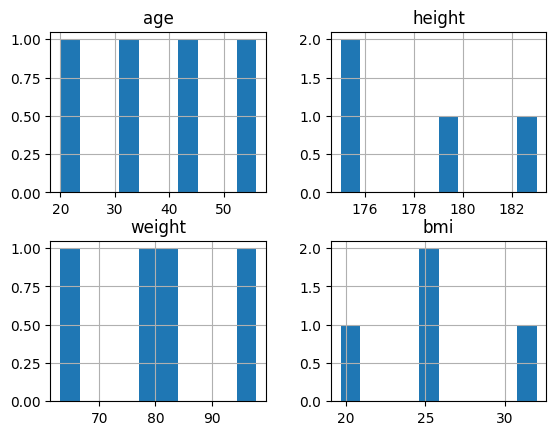

In [8]:
# histogram
my_df.hist()

<AxesSubplot: xlabel='age'>

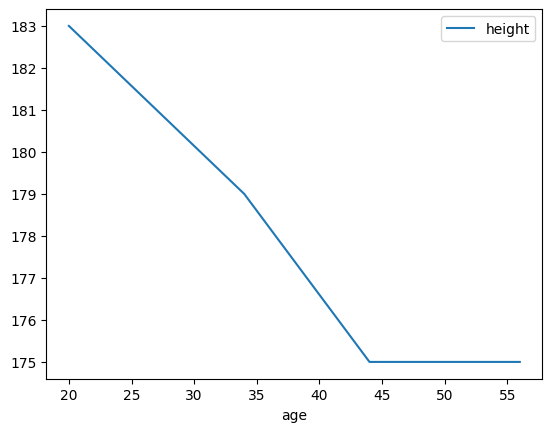

In [9]:
# lineplot
my_df.sort_values(by='age').plot.line(x='age', y='height')

<AxesSubplot: xlabel='age', ylabel='weight'>

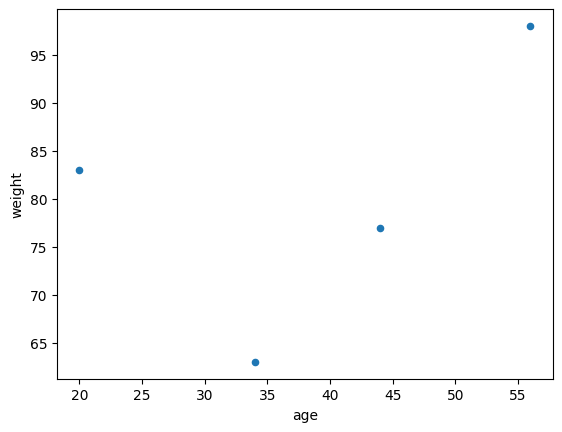

In [10]:
# scatter plot
my_df.plot.scatter(x='age', y='weight')

### Importing and Exporting Data

Your data may come to you in various file formats. Pandas enables you to import data from all common formats. The respective functions are usually called ```read_``` and ```to_``` followed by the respective file type.

To read a *.csv* for example, use the ```read_csv()``` function. Note that the file need not be stored locally on your computer.

In [11]:
# import from csv
import pandas as pd
dax = pd.read_csv('data/DAX.csv')
print(dax.head(3))
print(dax.tail(3))

         Date          Open          High           Low         Close  \
0  2020-03-10  10724.980469  11032.290039  10423.900391  10475.490234   
1  2020-03-11  10601.849609  10761.429688  10390.509766  10438.679688   
2  2020-03-12   9863.990234   9932.559570   9139.120117   9161.129883   

      Adj Close     Volume  
0  10475.490234  267400800  
1  10438.679688  216708900  
2   9161.129883  390477000  
           Date          Open          High           Low         Close  \
251  2021-03-08  14024.570313  14402.919922  13977.129883  14380.910156   
252  2021-03-09  14345.509766  14475.650391  14309.349609  14437.940430   
253  2021-03-10  14439.450195  14554.490234  14408.519531  14528.570313   

        Adj Close     Volume  
251  14380.910156  109071900  
252  14437.940430  107881800  
253  14528.570313          0  


In [12]:
# save data frame to excel
dax.to_excel('DAX.xlsx')

Lets do some exploration and manipulation of the historical data from the DAX index we just imported.
$ $

In [13]:
print('shape:', dax.shape)

shape: (254, 7)


In [14]:
dax.info()    # the 'Date' column is of dtype object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       254 non-null    object 
 1   Open       254 non-null    float64
 2   High       254 non-null    float64
 3   Low        254 non-null    float64
 4   Close      254 non-null    float64
 5   Adj Close  254 non-null    float64
 6   Volume     254 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [15]:
# check type of first entry in 'Date'
print(type(dax.Date[0]))

<class 'str'>


Transform it to *datetime*, a special type for dates in python.

In [16]:
dax['Datetime'] = pd.to_datetime(dax.Date)
print(dax.Datetime.head(3))    # check dtype now

0   2020-03-10
1   2020-03-11
2   2020-03-12
Name: Datetime, dtype: datetime64[ns]


In [17]:
print(dax.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Datetime'],
      dtype='object')


In [18]:
print(f'of {len(dax)} rows:\n{dax.notna().sum()}')
print('')
print(f'makes a total of {dax.isnull().sum().sum()} missing values')

of 254 rows:
Date         254
Open         254
High         254
Low          254
Close        254
Adj Close    254
Volume       254
Datetime     254
dtype: int64

makes a total of 0 missing values


<AxesSubplot: xlabel='Datetime'>

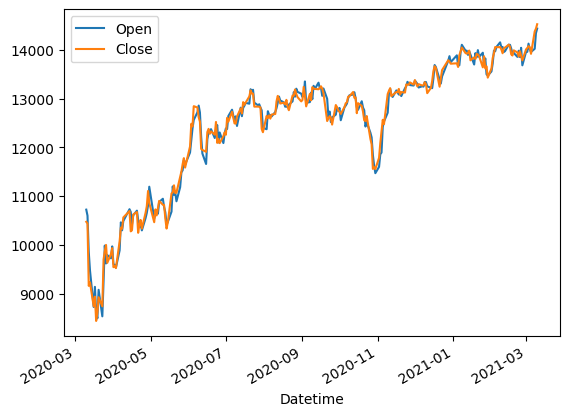

In [19]:
dax.plot(x='Datetime', y=['Open', 'Close'])    # using Datetime for plotting

In [20]:
dax.describe()

,Open,High,Low,Close,Adj Close,Volume
count,254.000000,254.000000,254.000000,254.000000,254.000000,2.540000e+02
mean,12488.785944,12595.082573,12373.931187,12489.142640,12489.142640,9.469272e+07
std,1324.154858,1295.824891,1365.892066,1331.191733,1331.191733,4.941752e+07
min,8495.940430,8668.480469,8255.650391,8441.709961,8441.709961,0.000000e+00
25%,11896.257813,12185.372315,11850.512451,12031.852783,12031.852783,6.409985e+07
50%,12847.964844,12945.129883,12764.479981,12851.169922,12851.169922,7.875350e+07
75%,13314.162353,13362.944824,13224.792481,13292.120362,13292.120362,1.085247e+08
max,14439.450195,14554.490234,14408.519531,14528.570313,14528.570313,3.904770e+08


For statistics on one variable, index the result as usual. 

In [21]:
mean_open = dax.describe().loc['mean', 'Open']
print(mean_open)

12488.785944444882

Create a new column, with a flag if the closing price was higher than the opening price.

In [22]:
dax = dax.assign(positive = dax.Close > dax.Open)
print(dax.head(3))

print('')
# fraction of days when this was the case
print('fraction of positive days:', dax.positive.mean())
print('\ncheck: \n', dax.positive.value_counts())

         Date          Open          High           Low         Close  \
0  2020-03-10  10724.980469  11032.290039  10423.900391  10475.490234   
1  2020-03-11  10601.849609  10761.429688  10390.509766  10438.679688   
2  2020-03-12   9863.990234   9932.559570   9139.120117   9161.129883   

      Adj Close     Volume   Datetime  positive  
0  10475.490234  267400800 2020-03-10     False  
1  10438.679688  216708900 2020-03-11     False  
2   9161.129883  390477000 2020-03-12     False  

fraction of positive days: 0.5

check: 
 False    127
True     127
Name: positive, dtype: int64


Extract same fraction for every day in the week. Days are counted from 0 (Monday) to 6 (Sunday). 

In [23]:
for i in range(7):
    print(f'day {i}: ', dax[dax.Datetime.dt.dayofweek == i].positive.mean())


day 0:  0.58
day 1:  0.49056603773584906
day 2:  0.5283018867924528
day 3:  0.44
day 4:  0.4583333333333333
day 5:  nan
day 6:  nan


A more straight forward way using built-in methods.

In [24]:
dax = dax.assign(wday = dax.Datetime.dt.dayofweek)
dax.groupby(['wday']).mean(numeric_only=True)  # rows with nans are not calculated

,Open,High,Low,Close,Adj Close,Volume,positive
wday,,,,,,,
0,12510.387852,12640.970996,12400.179629,12546.658457,12546.658457,8.860451e+07,0.580000
1,12523.045843,12621.270969,12403.764906,12520.457547,12520.457547,9.450496e+07,0.490566
2,12522.144310,12628.387014,12414.166403,12527.621886,12527.621886,9.062774e+07,0.528302
3,12422.626602,12512.666523,12286.600566,12394.369766,12394.369766,9.770017e+07,0.440000
4,12460.538106,12567.442179,12360.190674,12450.887695,12450.887695,1.025976e+08,0.458333


## Database and SQL

Beside CSV (or Excel) files, another way to work with data is using databases. From there, data can be accessed using a query language. A very common one for relational databases is **SQL** (**S**tructured **Q**uery **L**anguage). It allows to extract specific records, i.e. records which meet special requirements, from a database using single commands.

### Store in Database
First, saving a data frame to a database is conveniently done with a built-in method in Pandas. However, to access a database, a connection must first be established. In the following, we will use the **sqlalchemy** package for working with a database and use a _SQLite_ database engine.

In [25]:
from sqlalchemy import create_engine, Table

In [26]:
# setup SQLite engine and connect
path = 'data/dax_db.sqlite'
engine = create_engine('sqlite:///' + path, echo=False)  # if 'echo = False', information is not printed 
conn = engine.connect()

In [27]:
# save dataframe to database and close connection
dax.to_sql('historical_data', con=conn, if_exists='replace')
conn.close()       # close connection
engine.dispose()   # dispose engine

### Load from Database

To import data from a database, at first a connection must be created the same way as before. Then, **SQL** statements are used to fetch the data and store it in a Pandas dataframe. 

In [28]:
from sqlalchemy import inspect, select, MetaData

In [29]:
path = 'data/dax_db.sqlite'
engine = create_engine('sqlite:///' + path, echo=False)  # if 'echo = True', information is printed in every step
conn = engine.connect()

In [30]:
# show tables and columns with inspector
inspector = inspect(engine)
tables = inspector.get_table_names()
print(tables)

# show columns
for col in inspector.get_columns(tables[0]):
    print(f"Col: {col['name']},\t type: {col['type']}")

['historical_data']
Col: index,	 type: BIGINT
Col: Date,	 type: TEXT
Col: Open,	 type: FLOAT
Col: High,	 type: FLOAT
Col: Low,	 type: FLOAT
Col: Close,	 type: FLOAT
Col: Adj Close,	 type: FLOAT
Col: Volume,	 type: BIGINT
Col: Datetime,	 type: DATETIME
Col: positive,	 type: BOOLEAN
Col: wday,	 type: BIGINT


Use a MetaData Object, which holds information about the database.

In [31]:
m = MetaData()
m.reflect(engine)
print(m.tables.keys())

dict_keys(['historical_data'])


In [32]:
for table in m.tables.values():
    print(table.name)
    for column in table.c:
        print(f'Col: {column.name},\t, Type: {column.type}')

historical_data
Col: index,	, Type: BIGINT
Col: Date,	, Type: TEXT
Col: Open,	, Type: FLOAT
Col: High,	, Type: FLOAT
Col: Low,	, Type: FLOAT
Col: Close,	, Type: FLOAT
Col: Adj Close,	, Type: FLOAT
Col: Volume,	, Type: BIGINT
Col: Datetime,	, Type: DATETIME
Col: positive,	, Type: BOOLEAN
Col: wday,	, Type: BIGINT


Knowing all components, a query can be sent to get the required data from the database to a dataframe.
By convention, SQL is written in all CAPS, even though this is not required for the statement to work.

To select all columns from a table, the wildcard character ```*``` is used. The syntax is ```SELECT <col1>, <col2> FROM <table>```.

In [33]:
my_query = 'SELECT * FROM historical_data'

results = conn.execute(my_query)
df = pd.DataFrame(results.fetchall(), columns=results.keys())
df.head(2)

,index,Date,Open,High,Low,Close,Adj Close,Volume,Datetime,positive,wday
0,0,2020-03-10,10724.980469,11032.290039,10423.900391,10475.490234,10475.490234,267400800,2020-03-10 00:00:00.000000,0,1
1,1,2020-03-11,10601.849609,10761.429688,10390.509766,10438.679688,10438.679688,216708900,2020-03-11 00:00:00.000000,0,2


In [34]:
# built-in function in Pandas
df2 = pd.read_sql_query(my_query, conn)
df2.head(2)

,index,Date,Open,High,Low,Close,Adj Close,Volume,Datetime,positive,wday
0,0,2020-03-10,10724.980469,11032.290039,10423.900391,10475.490234,10475.490234,267400800,2020-03-10 00:00:00.000000,0,1
1,1,2020-03-11,10601.849609,10761.429688,10390.509766,10438.679688,10438.679688,216708900,2020-03-11 00:00:00.000000,0,2


For some sanity checks, not only regarding imports, the ```assert``` keyword will raise an error, if the trailing statement is not True. 

In [35]:
assert df.equals(df2)

To select specific columns only, the can be listed, separated by a comma

In [36]:
my_query = 'SELECT open, close FROM historical_data'

df = pd.read_sql_query(my_query, conn)
print(df.head(2))

print('')
# select only first 10 entries with LIMIT
my_query = 'SELECT open, close FROM historical_data LIMIT 10'

df = pd.read_sql_query(my_query, conn)
print('only 10 rows:', df.shape)

           Open         Close
0  10724.980469  10475.490234
1  10601.849609  10438.679688

only 10 rows: (10, 2)


The dataset can be filtered before being loaded into a dataframe. To pose restrictions on the import of records, use ```WHERE``` after the table name.

In [37]:
# select only first 10 entries with LIMIT
my_query = 'SELECT open, close FROM historical_data WHERE wday=0'   # note that 'wday' does not need to be imported

df = pd.read_sql_query(my_query, conn)
print('only mondays:\n', df.head())

only mondays:
            Open         Close
0   8728.480469   8742.250000
1   8536.330078   8741.150391
2   9725.879883   9815.969727
3   9889.030273  10075.169922
4  10704.349609  10675.900391


Only some of the other functions and commands will be shown, for a quick overview, see [this collection](https://www.sqltutorial.org/sql-cheat-sheet/).

In [38]:
# Count occurrence
my_query = 'SELECT Count(*) FROM historical_data WHERE wday=0'   
mon = pd.read_sql_query(my_query, conn).values
print('number of monday records in dataset:\n', mon)

number of monday records in dataset:
 [[50]]


In [39]:
# get distinct values
my_query = 'SELECT DISTINCT(wday) FROM historical_data'   
weekdays = pd.read_sql_query(my_query, conn).values
print('distinct weekdays in dataset:\n', weekdays)

distinct weekdays in dataset:
 [[1]
 [2]
 [3]
 [4]
 [0]]


In [40]:
# calculate mean
my_query = 'SELECT ROUND(AVG(open),2) as mean_open FROM historical_data'   
mean_open = pd.read_sql_query(my_query, conn)
print(mean_open)

   mean_open
0   12488.79


In [41]:
# import Variable under different name
my_query = 'SELECT ROUND(open,2) as opening_price, ROUND(close, 2) as closing_price FROM historical_data'
df = pd.read_sql_query(my_query, conn)
print(df.columns.to_list())

['opening_price', 'closing_price']


In order to automatically close connections after import or export, python offers the so-called *connection manager*. Usually, it is called with the keyword ```with``` and a variable after ```as```. The connection is only active in the indented block afterwards and is closed when leaving this body of the context manager.

In [42]:
# engine is already created
with engine.connect() as conn:
    my_q = 'SELECT * FROM historical_data LIMIT 1'
    df = pd.read_sql_query(my_q, conn)
    
print(df)

   index        Date          Open          High           Low         Close  \
0      0  2020-03-10  10724.980469  11032.290039  10423.900391  10475.490234   

      Adj Close     Volume                    Datetime  positive  wday  
0  10475.490234  267400800  2020-03-10 00:00:00.000000         0     1  


In [43]:
import os
os.getcwd()

'/Users/uni/Desktop/Lehre/python_class/testbook'

SQL offers a wide functionality, which is way beyond the scope of this course. To name just one more big advantage, not shown above, is that data from several related tables can be merged and loaded at once. 